# Recovering the first vertices in a *preferential attachment* model


#### Background Information

> This repository summarizes the main results and findings from my work for the Honors Thesis in Mathematics at University of California, San Diego, under the guidance of Professor Ery Arias-Castro. I successfully presented the work in Spring 2020.

> If you are interested in the full findings or the theoretical results (on the asymptotic accuracy and algorithm complexity), please refer to the 
> __[presentation slides](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis%20Presentation.pdf)__
> and the 
> __[thesis](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis%20-%20First%20Draft.pdf)__ for more details.

__Update 06/15/2020:__ The thesis received the High Distinction Honors award, the highest such award from the Department of Mathematics at UCSD for the academic year 2019-2020. More information is available [here](https://www.math.ucsd.edu/undergraduate/honors-program/honors-theses/index.html#2019-2020).

#### Contents

1.  __[Motivation](#Motivation)__
2.  __[Abstract](#Abstract)__
3.  __[Problem Statements](#ProblemStatements)__, corresponding to the [Data Generation](https://github.com/thn003/recovering_first_vertices/tree/master/Data%20Generation) Github folder
4.  __[Recover Vertex 1](#Recover1)__, corresponding to the [Recover Vertex 1](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20Vertex%201) Github folder
5.  __[Recover the First $L$ Vertices](#RecoverL)__, corresponding to the [Recover First Vertices](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20First%20Vertices) Github folder
6.  __[Reference](#Reference)__

In [1]:
from IPython.display import Image

<br/>

### 1.  <a id = 'Motivation'> Motivation </a>

Connectivity is by nature dynamic. A network of such can both grow and shrink over time. Here we desire to know the sources of such network, ie. the very first vertices in that dynamic network. Below is an example of a graph in different forms: fully (and correctly) labeled versus its unlabeled copies.

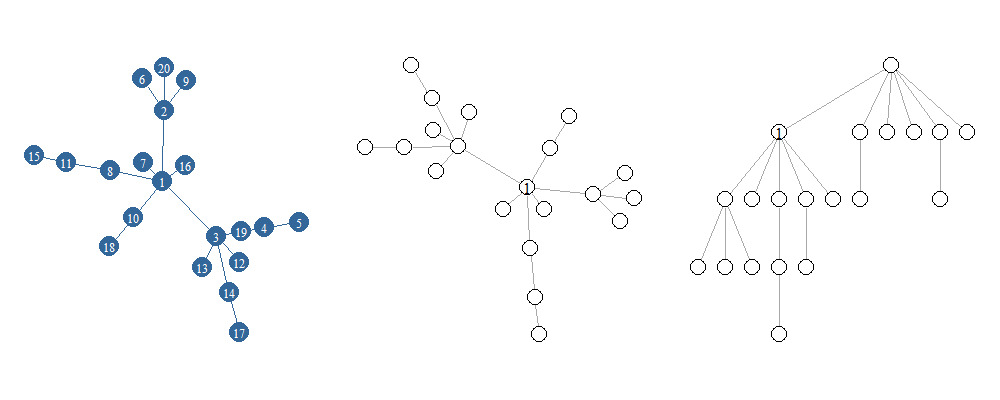

In [2]:
Image(filename = "Figures/Labeled vs Unlabeled Graphs.png", width=800, height=500)

We observe that as a network grows (having a lot more vertices), plotting out such network can get infeasible. We thus need a more disciplined approach to the problem. We study a particular case of dynamic graph:

>  __*preferential attachment model*__ on tree graphs, inspired by and often observed to highlight the "*the rich get richer*" phenomenon

Below is a snapshot of such graph with 50 vertices. Can you guess where vertex 1 is? Can you do better with vertices 1, 2, 3, and so on?

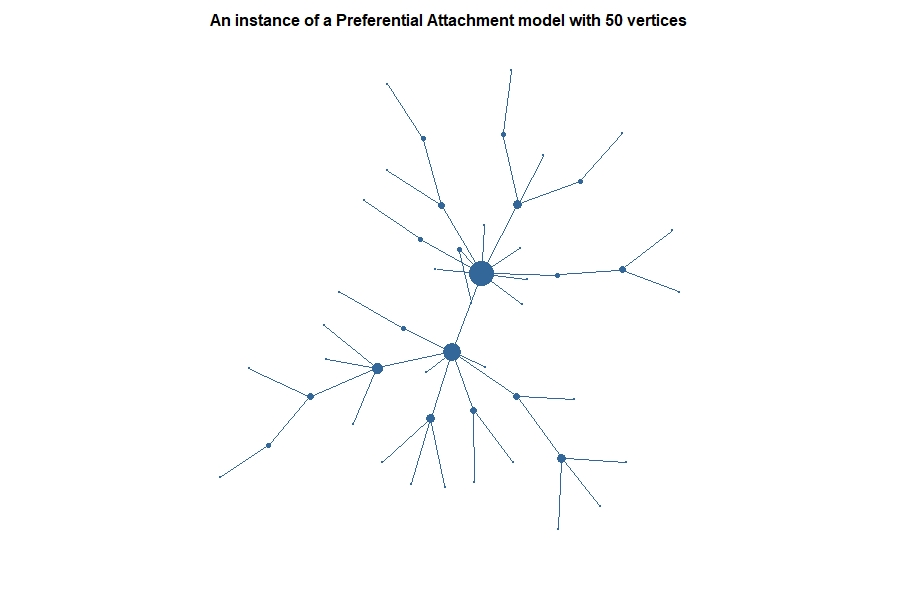

In [3]:
Image(filename = "Figures/Graph Example - Pref Attm.jpeg", width=500, height=500)

***

<br/>

### 2.  <a id = 'Abstract'> Abstract </a>

We study the problem of recovering the first vertices in a graph grown under the preferential attachment rules. We focus on tree graphs. We start with and build upon the algorithm introduced by Bubeck, Devroye, and Lugosi in [[1]](#Ref1) which looks at the largest connected component after removing any one vertex.

We first consider recovering only vertex 1. We provide a more detailed proof of the accuracy of the algorithm, which is taken from [[1]](#Ref1). We test the algorithm with simulations over a wide range of graph sizes. Given the computation cost, we propose a two-step procedure which combine that with using the vertex degree to cut down the complexity without giving up much accuracy. We then consider recovering the first L vertices. We propose a sequential algorithm where at each stage we do a local search conditioned on what already know. We conjecture on the expectation of that algorithm and then test the algorithm on simulations.

We find that we can get significantly accurate when recovering vertex 1. However, the problem starts becoming much harder once we want to recover more vertices. In particular, it only takes until the fifth vertex to observe considerable drops in the accuracy. Nonetheless, it appears that it is possible to increase the accuracy greatly if we are willing to return a larger set of suspected vertices.

***

<br/>

### 3.  <a id = 'ProblemStatements'> Problem Statements </a>

<!-- $$\text{Graph Theory} \ \bigcap \ \text{Probability} $$ -->

> ##### Graph Theory $\cap$ Probability

#### 3.1. Introduction

Ever since its introduction in the 70s and reintroduced and redefined in the 90s, *preferential attachment model* has been gaining popularity because of its many characteristics:

1. Describing the "the rich get richer" phenomena
2. Dynamic graph model which allows for growth over time
3. Offering great flexibility in twisting the model, which adapts to a variety of real-life situations

For our work, we work with the special case of tree graph. We denote the model as $T(n)$, which takes as input a seed graph of $T^{(0)}$. We define the model iteratively as follows:

* Suppose at time $n$, we have the tree graph $T(n)$, at time $n+1$:
    * Add a new vertex labeled $n+1$
    * Choose an existing vertex from $T(n)$, say $u$, such that
    $$ \mathbb{P} (u \text{  is chosen at step  } n+1) \propto (d_n(u))^{\alpha}
    $$
    * where $d_n(u)$ is the degree of vertex $u$ in the tree graph $T(n)$

Here, we assume the seed graph $T^{(0)}$ is a singleton (a single vertex with no edges). We note that when $\alpha = 0$, we have the __uniform attachement__ model, and when $\alpha = 1$ we have the __preferential attachment__ model.


#### 3.2. Problem Statement

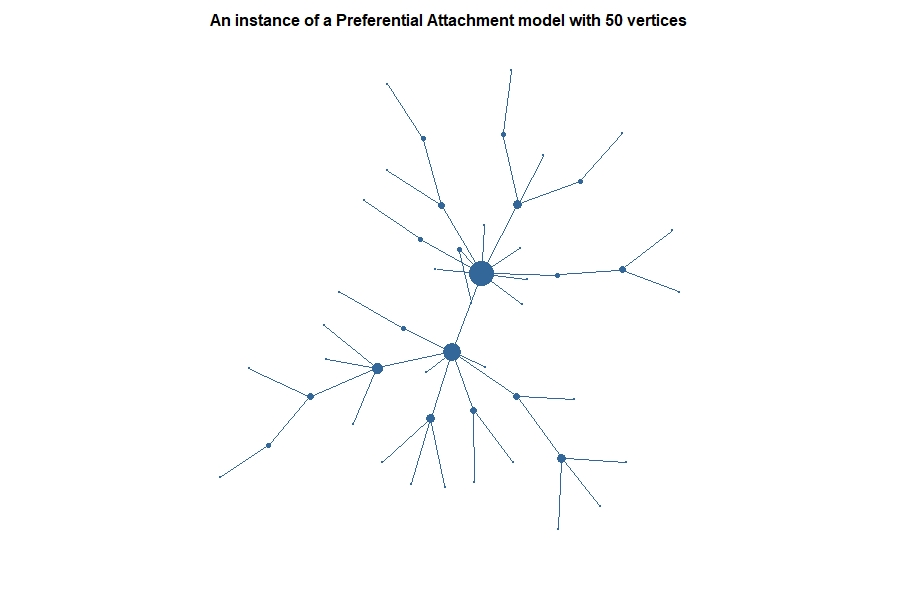

In [4]:
Image(filename = "Figures/Graph Example - Pref Attm.jpeg", width=500, height=500)

The graph above is an instance of our *preferential attachment* model on tree. Given such an unlabeled graph, it is natural to trace back to the beginning and determine the earliest vertices. We formalize the problem into 2 cases:

1. __Recovering vertex $1$__, ie. the seed graph $T^{(0)}$
2. __Recovering the first $L$ vertices__

In each problem, we will 

1. Introduce or propose algorithms
2. Present simulation results, demonstrating the algorithms' accuracy and precision

For this study, we define:
$$
Accuracy = \frac{\text{#(simulations: all L vertices are recovered)}}{\text{#(simulations)}} 
\ \ \ \ \ \ \text{and} \ \ \ \ \ \ 
Precision = \frac{L}{K}
$$

where $K$ is the number of vertices needed to return after running the algorithms.

###### Notes:

> If you are interested in the theoretical results of the algorithms, please refer to the 
> __[presentation slides](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis%20Presentation.pdf)__
> or the
> __[thesis](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis%20-%20First%20Draft.pdf)__ for more details.

***

<br/>

### 4.  <a id = 'Recover1'> Recovering Vertex $1$ </a>

>  The respective Github folder is [Recover Vertex 1](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20Vertex%201).

#### 4.1. Algorithms

We first cite the paper from which the main algorithm and the methodology took inspiration from:
> Sebastien Bubeck, Luc Devroye, and Gabor Lugosi. Finding Adam in random growing trees. Random Structures Algorithms, 50(2):158{172}, Nov 2016.

__Idea:__ We look at the largest connected component after removing each vertex.

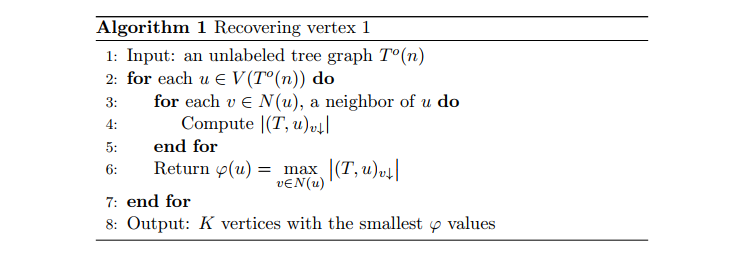

In [5]:
Image(filename = "Figures/Github Readme - Recover 1 - Algorithm 1.png", width=600)

We also note another alternative which uses the vertex degree as the criteria for choosing vertices. In particular, instead of computing $\varphi(u)$ and take $K$ vertices with the smallest $\varphi$ values, we compute $\deg(u)$ and take $K$ vertices with the largest degrees. We note that computing $\varphi$ is very expensive relative to computing vertex degree.

#### 4.2. Results (Not exhaustive)

###### Notes on the simulation logistics

> We built graphs across a wide range of sizes, from $5,000$ to as big as $75,000$. For each graph size, we built $1,000$ copies. For each problem, we run the algorithms over all graph sizes and tried out different $K$.
> Due to the computation cost of computing $\varphi$, we only computed $\varphi$ for the first $5,000$ vertices. We assigned $\varphi(u) = n - 1$ for all subsequent vertices $u$.

We first look at the accuracy of our algorithm using the $\varphi$ values:

1.  Returning K = 20 vertices over a wide range of graph sizes
2.  Returning over a range of K on graph of $50,000$ vertices
3.  Across a wide range of graph sizes and $K$

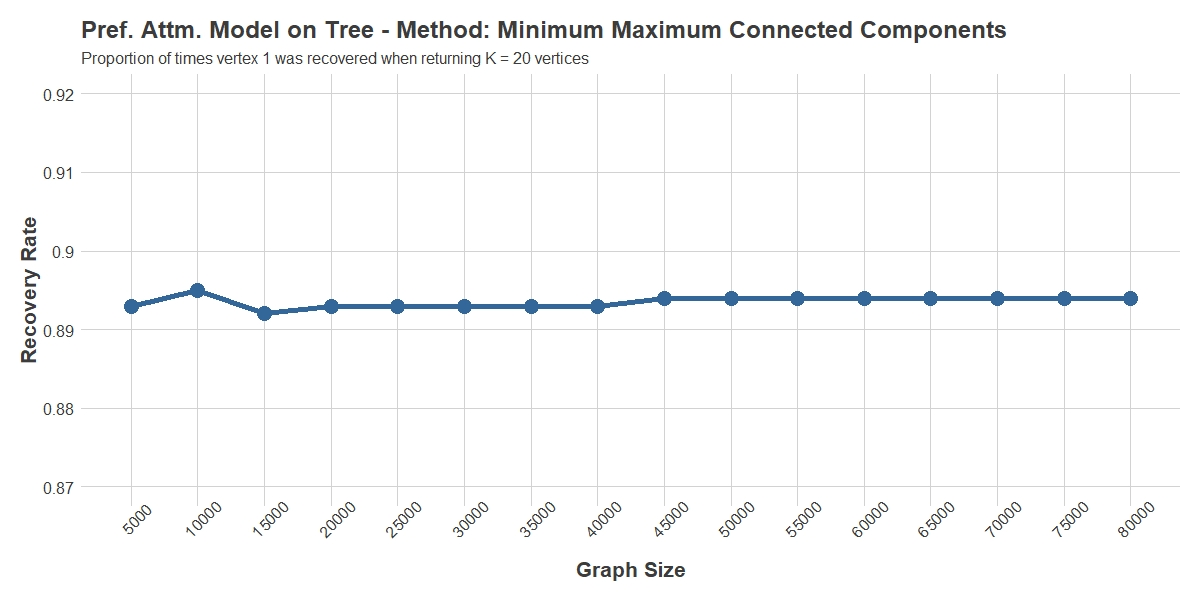

In [6]:
Image(filename = "Figures/Pref Attm - Recover 1 - Phi - K = 20.jpeg", width=500)

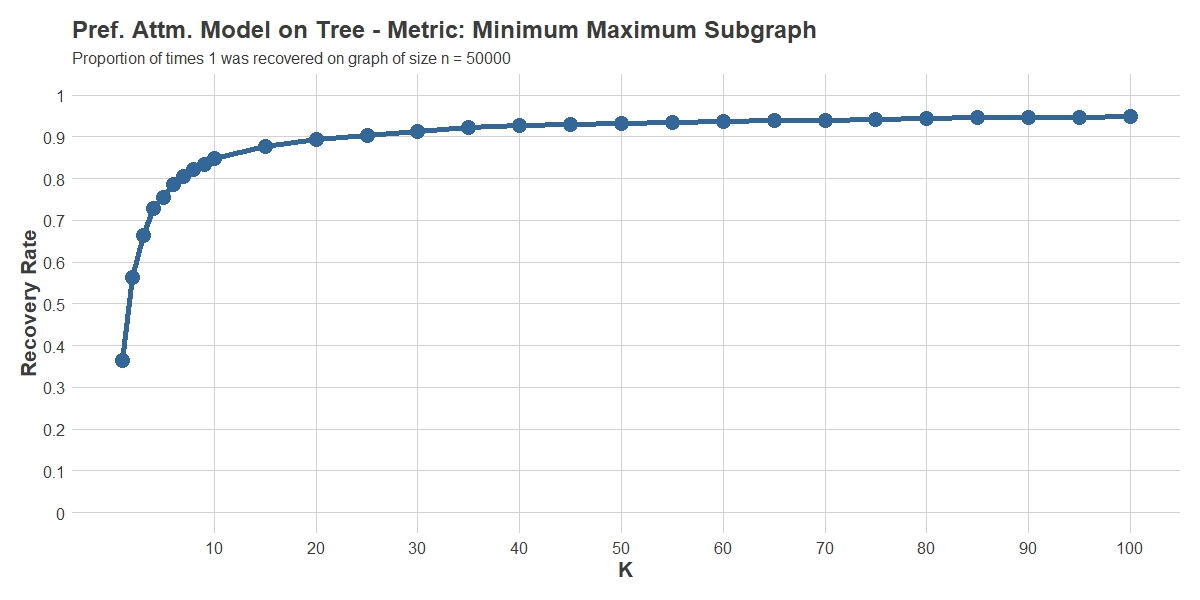

In [7]:
Image(filename = "Figures/Pref Attm - Recover 1 - Subgraphs - n = 50,000.jpeg", width=500)

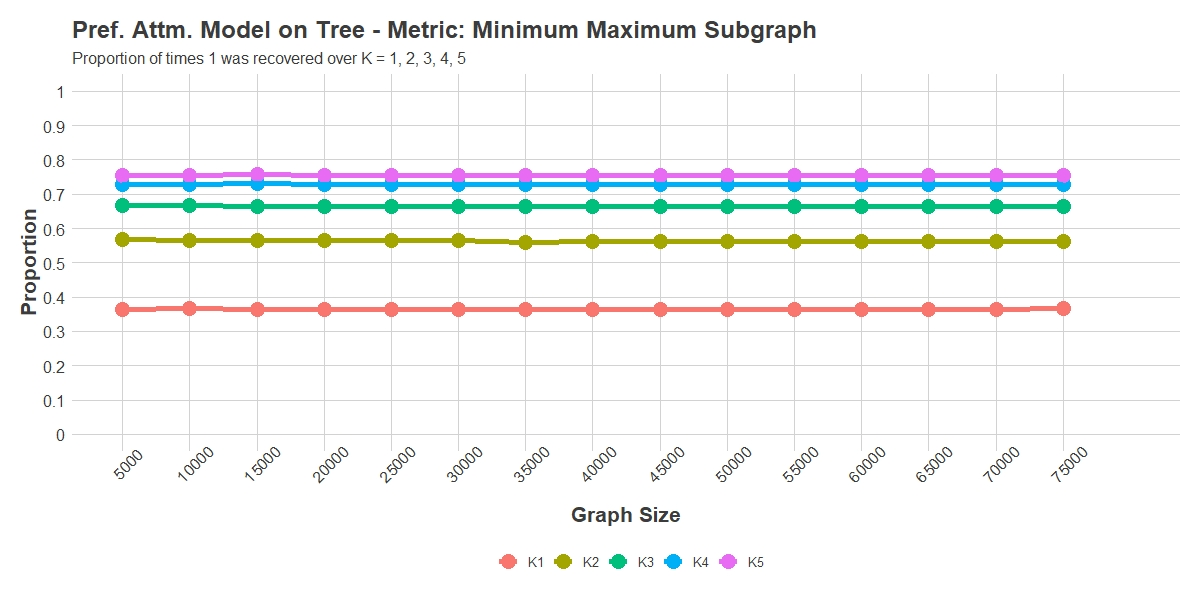

In [8]:
Image(filename = "Figures/Pref Attm - Recover 1 - Subgraphs - K = 1,2,3,4,5.jpeg", width=500)

We observe that we can accurate very quickly, which implies that we can be both accurate and precise. However, due to the computation cost, we propose an algorithm which combines using the $\varphi$ value and vertex degree.

##### Proposed Variant

__Idea:__ We use vertex degree to narrow down the most probable vertices before committing to computing $\varphi$.

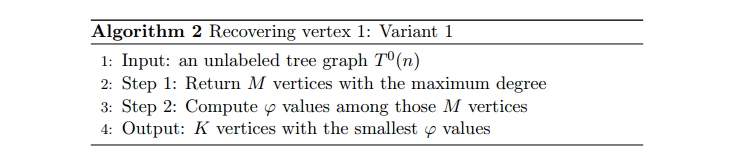

In [9]:
Image(filename = "Figures/Github Readme - Recover 1 - Algorithm 2.png", width=600)

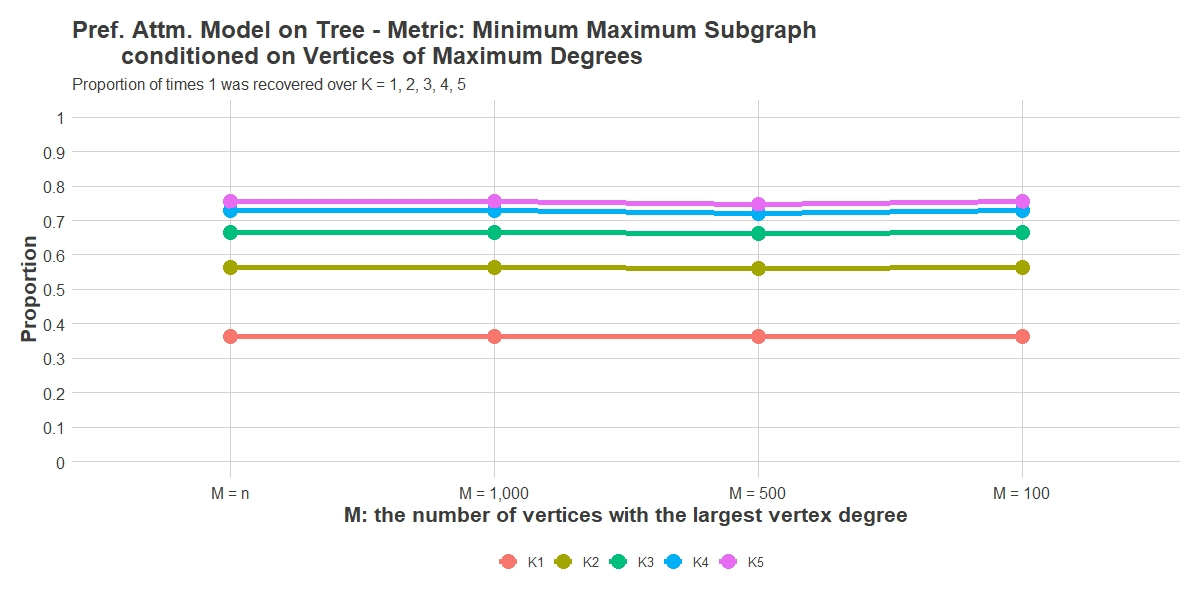

In [10]:
Image(filename = "Figures/Pref Attm - Comparison - Subgraphs vs Subgraphs on Degrees - K = 1,2,3,4,5.jpeg", width=500)

We observe that by conditioning on vertex degree, we have saved a lot in terms of computing time while giving up little (to no visible) losses in accuracy.

For further results, please refer to the [Figures folder](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20Vertex%201/Figures) for the figures and the [Thesis](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis.pdf) for the discussion.

***

<br/> 

### 5.  <a id = 'RecoverL'> Recovering the first $L$ vertices </a>

>  The respective Github folder is [Recover First Vertices](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20First%20Vertices).

#### 5.1. Algorithms

We propose a __sequential local search__ algorithm.

__Idea:__ We sequentially search and update based on current knowledge over stages.

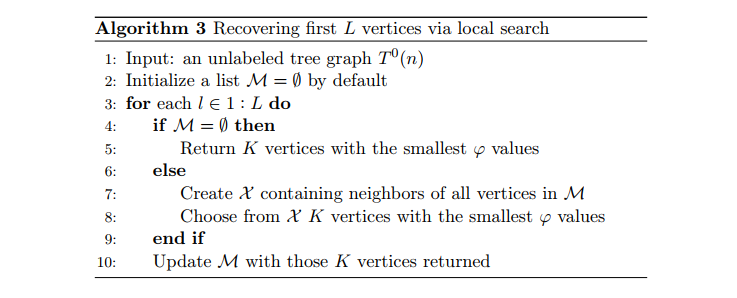

In [11]:
Image(filename = "Figures/Github Readme - Recover L - Algorithm 3.png", width=600)

#### 5.2. Results (Not exhaustive)

We first look at the recovery rate of our proposed *sequential local search* algorithm:

1. Recovering the first $5$ and $10$ vertices over graph of $50,000$ vertices
2. Recovering the first $5$ vertices over a wide range of graph sizes

In principle, as specified in algorithm $3$, the number of vertices returned per stage, $K$, can be treated as a parameter and hence can vary across different stages. We only consider the special case of fixing $K$ constant here.

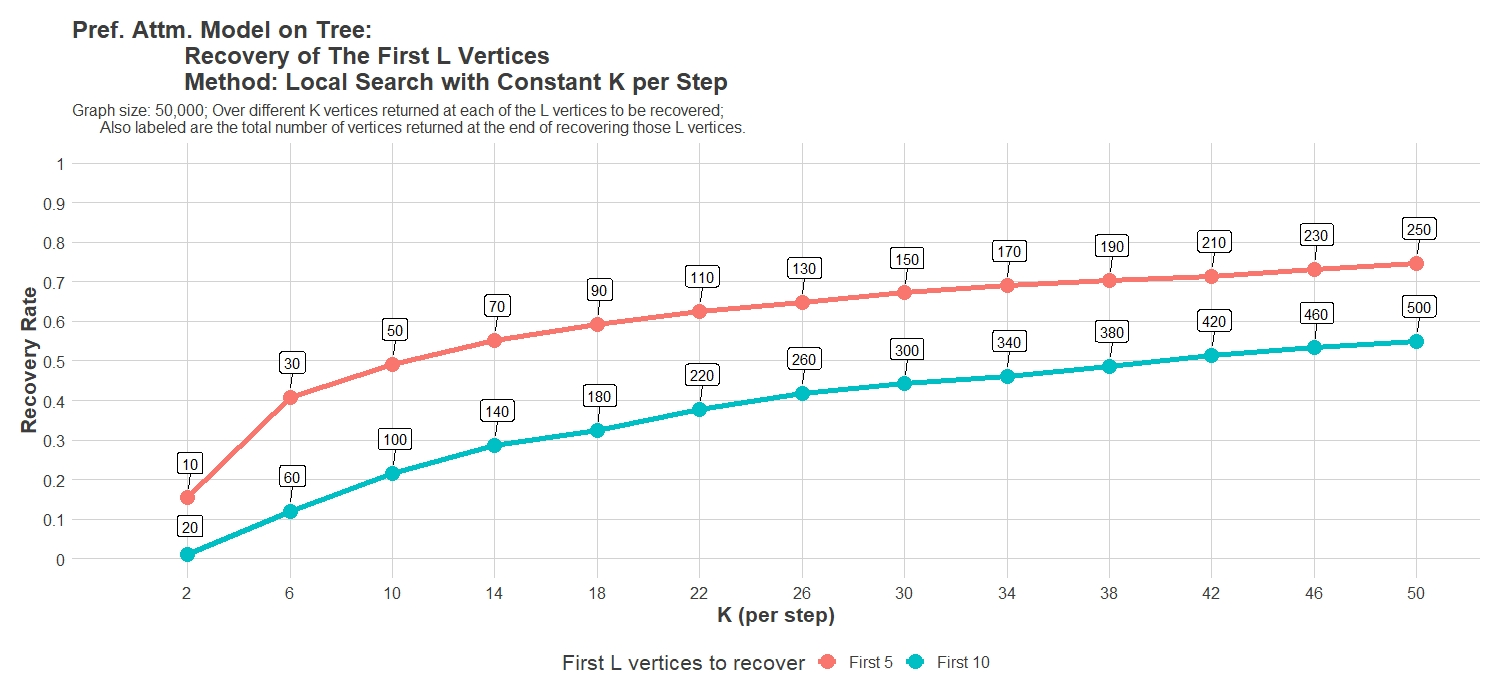

In [12]:
Image(filename = "Figures/Pref Attm - Recover L Vertices - Local Search - Phi - n = 50,000.jpeg", width=500)

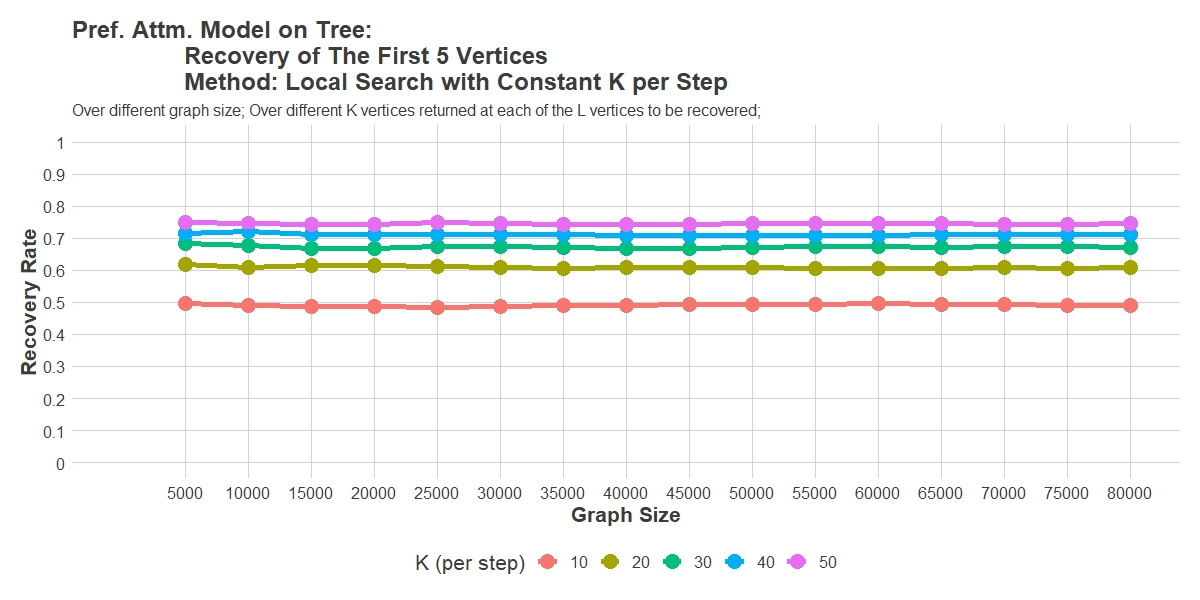

In [13]:
Image(filename = "Figures/Pref Attm - Recover 5 Vertices - Local Search - Subgraphs - K = 10,20,30,40,50.jpeg", width=500)

We observe that there is a significant drop in accuracy when we want to expand our search to recover more than just vertex $1$. However, we also observe an interesting behavior that once we fix the objective and the algorithm, the accuracy remains very stable across a wide range of graph sizes. This brings to us an impression that the difficulty of the problem relies mostly on the structure of the graphs and our objectives and not so much on the graph sizes themselves.

We now present a comparison between our *sequential local search* versus a simple search of returning vertices of the smallest $\varphi$ values.

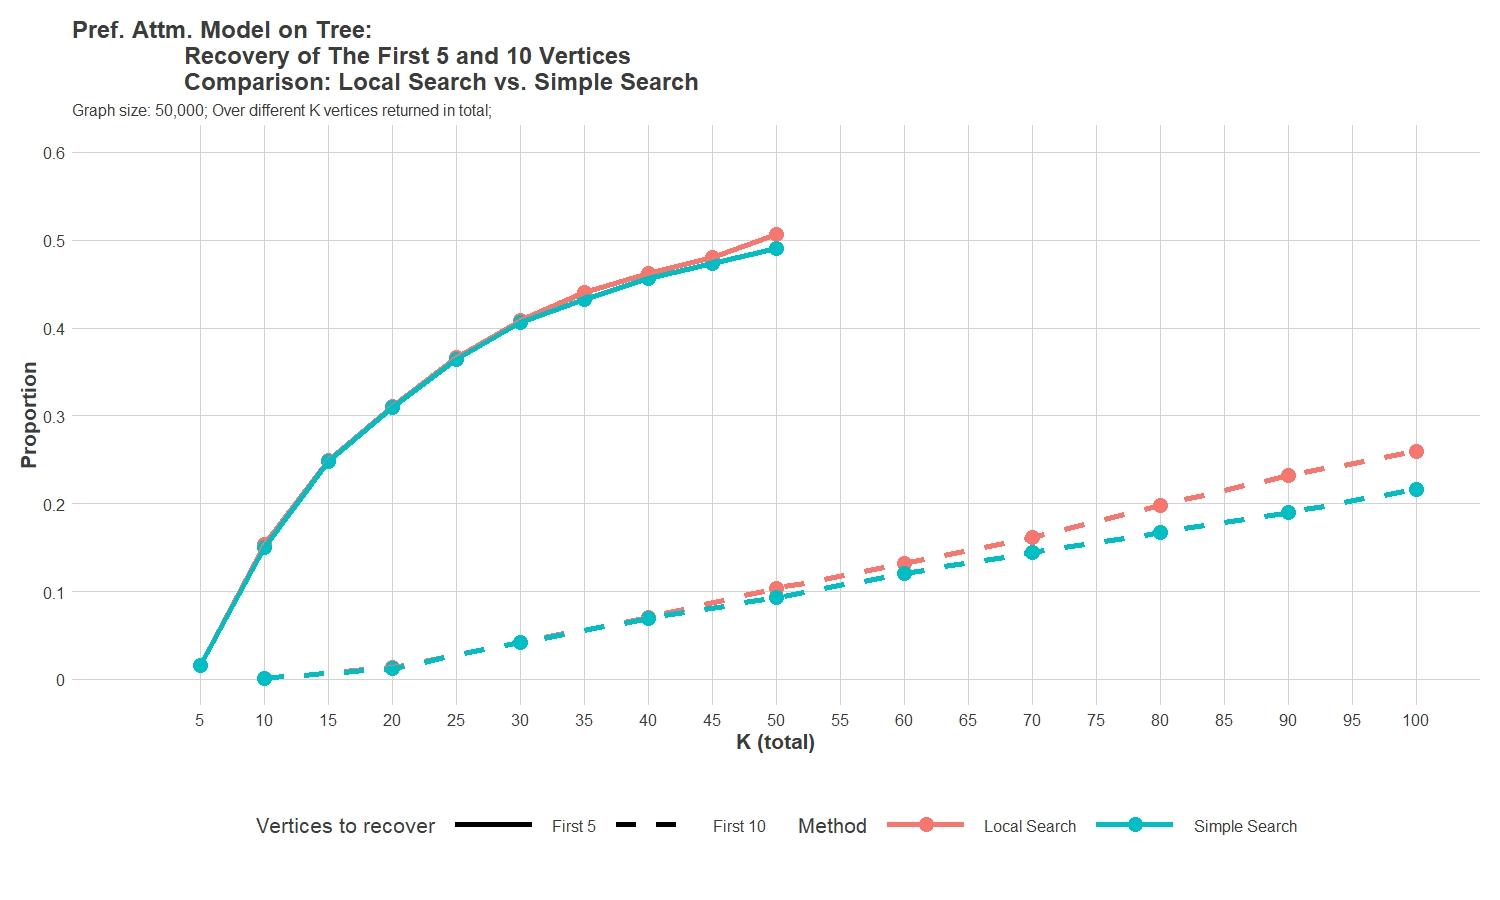

In [14]:
Image(filename = "Figures/Pref Attm - Recover 5 and 10 Vertices - Comparison - Local Search vs Simple Search.jpeg", width=500)

We observe that when we want to return only a small number of vertices, there is no visible differences in accuracy. However, if we are willing to return more vertices, our proposed algorithm starts to perform better than the simple search.

For further results, please refer to the [Figures folder](https://github.com/thn003/recovering_first_vertices/tree/master/Recover%20First%20Vertices/Figures) for the figures and the [Thesis](https://github.com/thn003/recovering_first_vertices/blob/master/%5BThu%20Nguyen%5D%20Math%20199H%20-%20Thesis.pdf) for the discussion.

***

<br/>

#### 6.  <a id = 'Reference'> Reference </a>

1.  <a id='Ref1'> Sebastien Bubeck, Luc Devroye, and Gabor Lugosi. Finding adam in random growing trees. *Random Structures Algorithms*, 50(2), 2016. </a>
